In [2]:
import sys, os
import pandas as pd

sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")

from Clust.clust.ML.common.common import p1_integratedDataSaving as p1
import pathSetting
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'Clust'

# 1. Set datasetName and related parameters

In [2]:
### 1-0. Set DataSetNameList
datasetNameList=['Hs1SwineFarmWithWeatherTime', 'gunwiStrawberryWithWeatherTime', 'strawberryOpenTime']

### 1-1. Change Variables#########################################################
datasetName = datasetNameList[0]
DataSaveMode='CSV' #CSV or influx
integration_freq_sec = 60 * 5 # 5분
#################################################################################

In [3]:
## 1-2. PreDefine Condition
# if datasetName=='Hs1SwineFarmWithWeatherTime':
#     dataInfo = [['farm_swine_air', 'Sadle'], ['weather_outdoor_keti_clean', 'sangju'], ['life_additional_Info', 'trigonometicInfoByHours']]
#     trainStartTime = "2020-11-25 00:00:00"
#     trainEndTime ="2020-12-25 00:00:00"
#     testStartTime ="2020-12-26 00:00:00"
#     testEndTime ="2021-01-03 00:00:00"
    
    
if datasetName=='Hs1SwineFarmWithWeatherTime':
    trainStartTime = "2021-02-01 00:00:00"
    trainEndTime ="2021-03-10 00:00:00"
    testStartTime ="2021-03-10 00:00:00"
    testEndTime ="2021-03-17 00:00:00"
    dataInfo = [['farm_swine_air', 'HS2'], ['weather_outdoor_keti_clean', 'sangju'], ['life_additional_Info', 'trigonometicInfoByHours']]
    
elif datasetName=='gunwiStrawberryWithWeatherTime':
    dataInfo = [['farm_strawberry_gunwi', 'control_environment'], ['farm_strawberry_gunwi', 'environment'], ['life_additional_Info', 'trigonometicInfoByHours']]
    trainStartTime = "2022-01-22 00:00:00"
    trainEndTime ="2022-02-25 00:00:00"
    testStartTime ="2022-02-25 00:00:00"
    testEndTime ="2022-02-28 00:00:00"
    
elif datasetName =='strawberryOpenTime':
    dataInfo = [['farm_strawberry_gunwi', 'control_environment'], ['farm_strawberry_gunwi', 'environment'], ['life_additional_Info', 'trigonometicInfoByHours']]
    trainStartTime = "2022-01-22 00:00:00"
    trainEndTime ="2022-02-25 00:00:00"
    testStartTime ="2022-02-25 00:00:00"
    testEndTime ="2022-02-28 00:00:00"
    
##################################################
#### 1-3. Static Varialbe List
LearningModeList=["train", "test"]
cleanParamList =["Clean", "NoClean"]
##################################################

# 2. Make Save Dataset And Metadata

processingStart
=====  CO2ppm - 25%: 1939.0 75% 3451.0
===========IQR Low~High: -149261.0 ~ 154651.0
=====  H2Sppm - 25%: 1.0 75% 4.0
===========IQR Low~High: -299.0 ~ 304.0
=====  Humidity - 25%: 52.3 75% 61.1
===========IQR Low~High: -827.7000000000005 ~ 941.1000000000005
=====  NH3ppm - 25%: 16.0 75% 38.0
===========IQR Low~High: -2184.0 ~ 2238.0
=====  Temperature - 25%: 15.6 75% 23.4
===========IQR Low~High: -764.3999999999999 ~ 803.3999999999999
=====  out_humid - 25%: 42.0 75% 75.0
===========IQR Low~High: -3258.0 ~ 3375.0
=====  out_pressure - 25%: 1006.075 75% 1014.5
===========IQR Low~High: 163.5750000000046 ~ 1856.9999999999955
=====  out_rainfall - 25%: 0.0 75% 0.0
===========IQR Low~High: 0.0 ~ 0.0
=====  out_sunshine - 25%: 0.0 75% 0.0
===========IQR Low~High: 0.0 ~ 0.0
=====  out_temp - 25%: -0.7 75% 7.1
===========IQR Low~High: -780.7 ~ 787.1
=====  out_wind_direction - 25%: 70.0 75% 270.0
===========IQR Low~High: -19930.0 ~ 20270.0
=====  out_wind_speed - 25%: 0.8 75% 

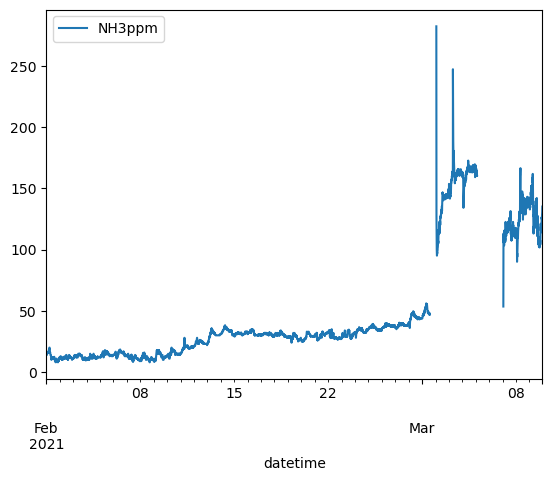

processingStart
processingEnd
integrationStart
integrationEnd


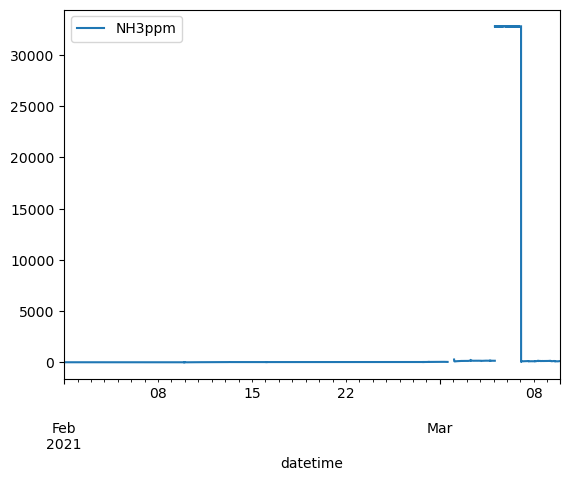

processingStart
=====  CO2ppm - 25%: 2630.0 75% 3743.0
===========IQR Low~High: -108670.0 ~ 115043.0
=====  H2Sppm - 25%: 3.0 75% 5.0
===========IQR Low~High: -197.0 ~ 205.0
=====  Humidity - 25%: 59.2 75% 64.7
===========IQR Low~High: -490.8 ~ 614.7
=====  NH3ppm - 25%: 120.0 75% 180.0
===========IQR Low~High: -5880.0 ~ 6180.0
=====  Temperature - 25%: 23.7 75% 26.1
===========IQR Low~High: -216.30000000000024 ~ 266.10000000000025
=====  out_humid - 25%: 45.0 75% 90.0
===========IQR Low~High: -4455.0 ~ 4590.0
=====  out_pressure - 25%: 1007.3 75% 1012.0
===========IQR Low~High: 537.2999999999954 ~ 1482.0000000000045
=====  out_rainfall - 25%: 0.0 75% 0.0
===========IQR Low~High: 0.0 ~ 0.0
=====  out_sunshine - 25%: 0.0 75% 0.0
===========IQR Low~High: 0.0 ~ 0.0
=====  out_temp - 25%: 5.074999999999999 75% 14.249999999999998
===========IQR Low~High: -912.4249999999998 ~ 931.7499999999999
=====  out_wind_direction - 25%: 70.0 75% 270.0
===========IQR Low~High: -19930.0 ~ 20270.0
=====  

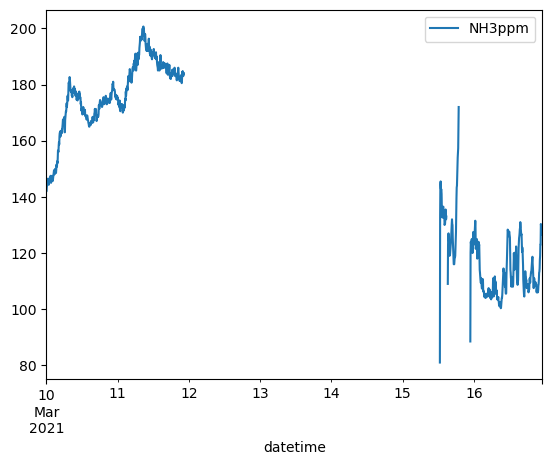

processingStart
processingEnd
integrationStart
integrationEnd


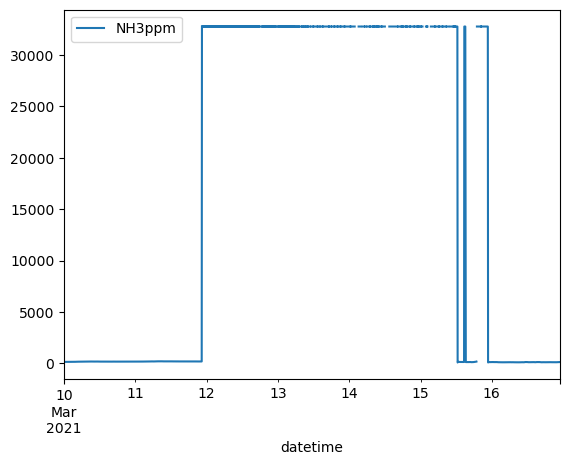

In [4]:
for learningMode in LearningModeList:
    for cleanParam in cleanParamList:
        processParam = p1.get_process_param(cleanParam) 
        if learningMode == 'train':
            startTime = trainStartTime
            endTime = trainEndTime

        elif learningMode =='test':
            startTime = testStartTime
            endTime = testEndTime
        
        dbName ='intData_'+datasetName
        dataName =learningMode+cleanParam+'_'+datasetName
        # dataName = getNewDataName()
        data = p1.getData(pathSetting.db_client, dataInfo, integration_freq_sec, processParam, startTime, endTime)
        if DataSaveMode == 'influx':
            p1.save_influx_data(dbName, dataName, data, pathSetting.db_client)
        elif DataSaveMode == 'CSV':
            fileName = p1.save_csv_data(pathSetting.dataFolderPath, dataName, data)
        data[['NH3ppm']].plot()
        plt.show()
            
        p1.saveJsonMeta(pathSetting.DataMetaPath, dataName, processParam, dataInfo,integration_freq_sec, startTime, endTime, cleanParam, DataSaveMode)